[10.966666666666667, 16.4, 16.4, 22.177777777777777, 16.544444444444444, 22.355555555555554, 21.31111111111111, 23.266666666666666, 11.222222222222221, 17.044444444444444, 16.477777777777778, 21.31111111111111, 12.911111111111111, 18.355555555555554, 12.044444444444444, 19.7, 23.711111111111112, 23.266666666666666, 14.166666666666666, 19.833333333333332, 17.022222222222222, 15.577777777777778, 16.555555555555557, 23.1, 16.38888888888889, 11.644444444444444, 21.68888888888889, 19.7, 18.355555555555554, 17.022222222222222, 17.41111111111111, 21.31111111111111, 20.766666666666666, 23.1, 17.355555555555554, 20.766666666666666, 21.68888888888889, 17.41111111111111, 18.355555555555554, 15.577777777777778, 15.577777777777778, 17.022222222222222, 16.544444444444444, 20.966666666666665, 21.68888888888889, 16.61111111111111, 15.377777777777778, 23.1]
48


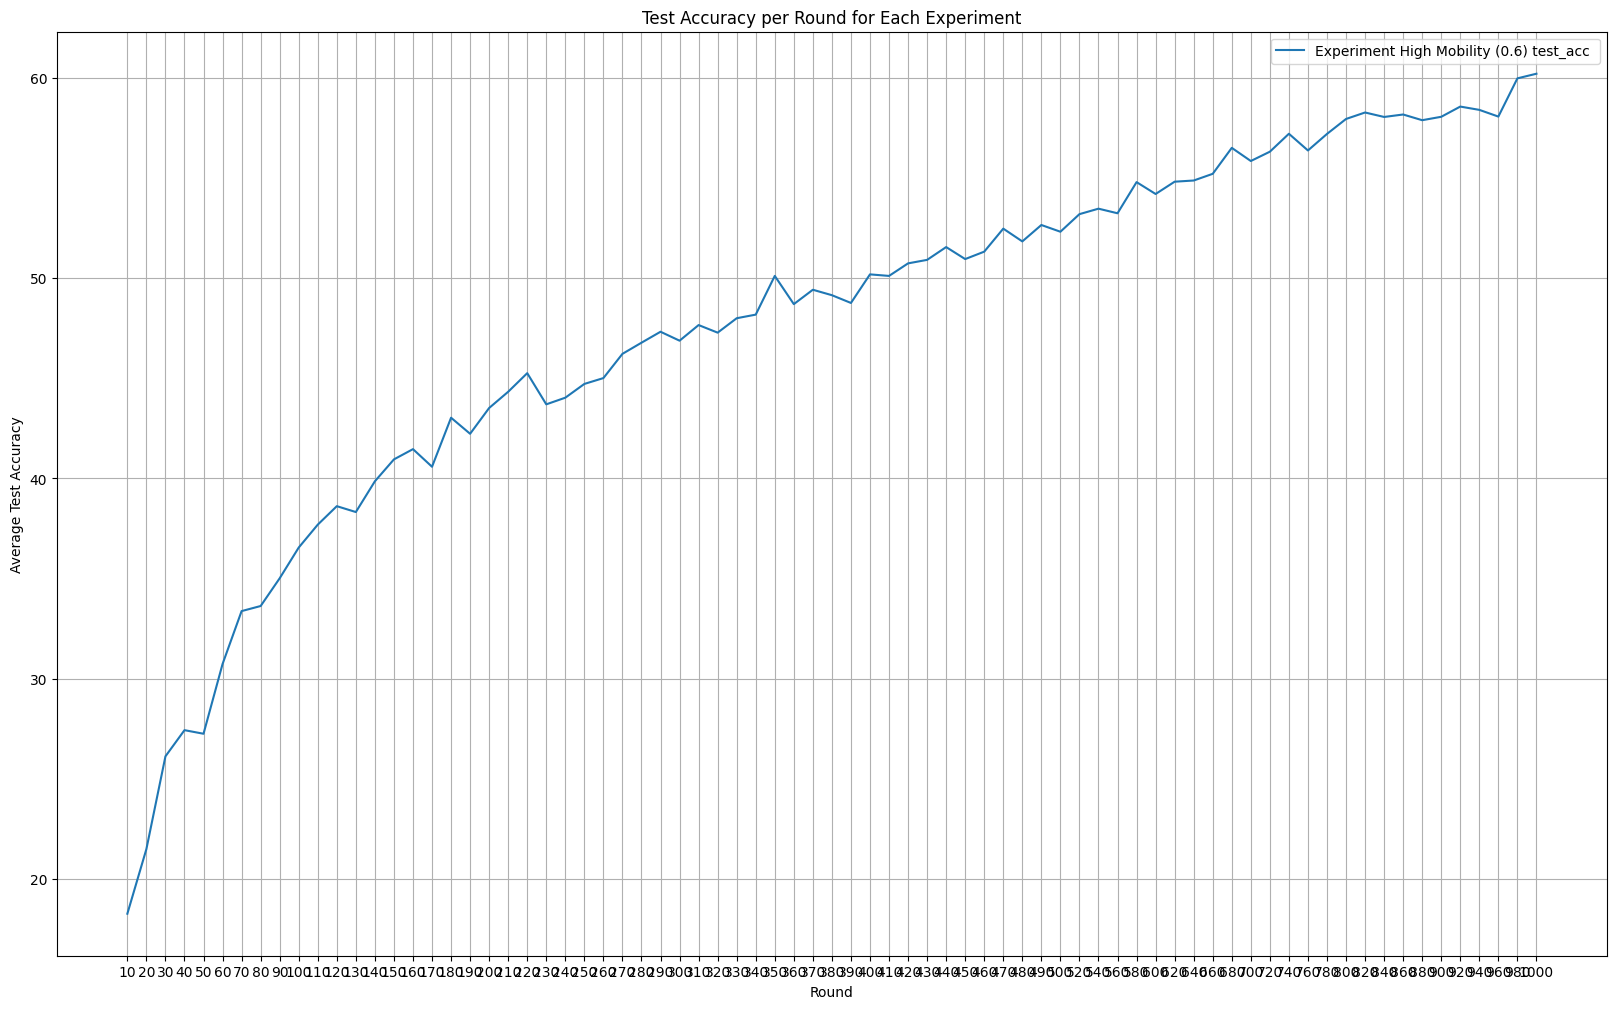

In [21]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt    
from collections import defaultdict


def average_of_first_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[:n])

def average_of_last_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[-n:])

num_nodes = 48
experiments = {
    0.6: ".saved_experiments/45-2024-05-30T03:29-dynamic_48_0_6.txt/machine0",
    # 0.8: ".saved_experiments/45-2024-05-30T04:07-dynamic_48_0_8.txt/machine0",
}
experiment_names = {
    0.6: "High Mobility (0.6)",
    # 0.8: "High Mobility (0.8)",
}
data = {}

for experiment, dir in experiments.items():
    data[experiment] = {}
    for i in range(num_nodes):
        file_path = os.path.join(dir, f"{i}_results.json")
        if os.path.exists(file_path):
            with open(file_path, "r") as file:
                content = json.load(file)

                for statistic, rounds in content.items():
                    if statistic not in data[experiment]:
                        data[experiment][statistic] = {}

                    for round, value in rounds.items():
                        if round not in data[experiment][statistic]:
                            data[experiment][statistic][round] = []
                        data[experiment][statistic][round].append(value)


statistics = ["test_acc"]
averages = {}
high_mobility_averages = defaultdict(lambda: defaultdict(dict))
low_mobility_averages = defaultdict(lambda: defaultdict(dict))
for experiment in data:
    averages[experiment] = {}
    for statistic in statistics:
        if statistic not in averages[experiment]:
            averages[experiment][statistic] = {}

        for round, values in data[experiment][statistic].items():
            averages[experiment][statistic][round] = np.mean(values)

            if round == "10":
                print(values)
                print(len(values))

            high_mobility_proportion = experiment
            low_mobility_proportion = 1 - experiment
            high_mobility_averages[experiment][statistic][round] = average_of_first_percent(values, high_mobility_proportion)
            low_mobility_averages[experiment][statistic][round] = average_of_last_percent(values, low_mobility_proportion)

plt.figure(figsize=(20, 12))
def plot_averages(experiment_names, averages, extra_info=""):
    for experiment, statistics_dict in averages.items():
        for statistic in statistics:
            rounds, acc_values = zip(*averages[experiment][statistic].items())
            plt.plot(rounds, acc_values, label=f"Experiment {experiment_names[experiment]} {statistic} {extra_info}")

plot_averages(experiment_names, averages)

plt.xlabel("Round")
plt.ylabel("Average Test Accuracy")
plt.title("Test Accuracy per Round for Each Experiment")
plt.legend()
plt.grid(True)
plt.show()


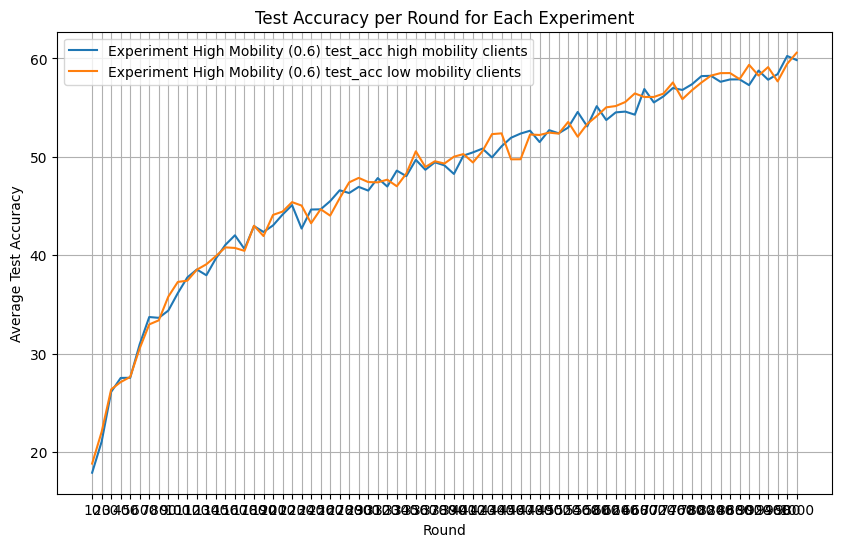

In [5]:
plt.figure(figsize=(10, 6))

plot_averages(experiment_names, high_mobility_averages, 'high mobility clients')
plot_averages(experiment_names, low_mobility_averages, 'low mobility clients')

plt.xlabel("Round")
plt.ylabel("Average Test Accuracy")
plt.title("Test Accuracy per Round for Each Experiment")
plt.legend()
plt.grid(True)
plt.show()
